<a href="https://colab.research.google.com/github/silverjin01/2020-2-AI/blob/master/09W_1_tf2_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

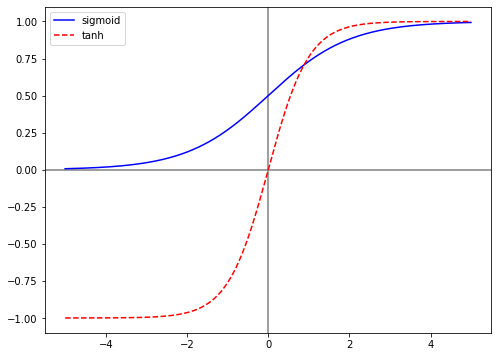

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 그림 4.2 출력 코드
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.figure(figsize=(8, 6))

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

In [ ]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np
# 인구증가율과 고령인구비율
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -
0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4.8 딥러닝 네트워크의 학슴
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 254.9854
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 112.1636
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 11.3189
Epoch 4/10
1/1 [==============================] - 0s 955us/step - loss: 9.5722
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5382
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5219
Epoch 7/10
1/1 [==============================] - 0s 998us/step - loss: 9.5051
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4874
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4689
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4494


In [ ]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X) 

array([[15.784448],
       [15.777109],
       [15.058353],
       [15.886444],
       [15.176549],
       [15.813489],
       [15.913397],
       [15.881896],
       [15.78136 ],
       [15.901196],
       [15.746068],
       [15.894457],
       [15.911949],
       [15.888775],
       [15.785563],
       [14.33209 ]], dtype=float32)

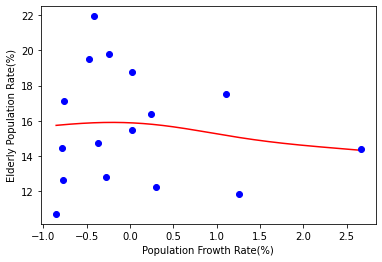

In [ ]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

plt.xlabel('Population Frowth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

In [ ]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
# import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -
0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
# a와 b를 랜덤한 값으로 초기화합니다.
# a = tf.Variable(random.random())
# b = tf.Variable(random.random())
a = tf.Variable(tf.random.uniform([1], 0, 1))
b = tf.Variable(tf.random.uniform([1], 0, 1))
# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화(minimize)합니다.
  optimizer.minimize(compute_loss, var_list=[a,b])
if i % 100 == 99:
  print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

999 a: [-0.35583326] b: [15.669303] loss: 9.780805


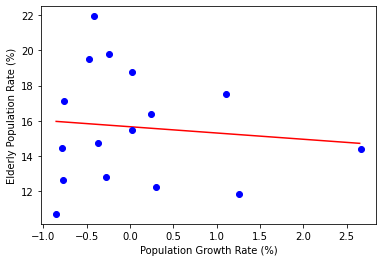

In [ ]:
# 텐서플로만을 이용한 회귀 분석 회귀선 그리기
import matplotlib.pyplot as plt
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

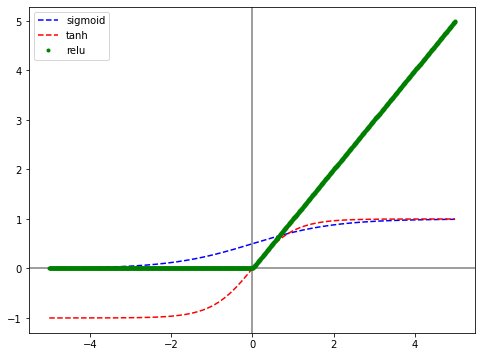

In [ ]:
# 보스톤 주택 가격 예측
# 활성화 함수 
import math
def sigmoid(x):
  return 1 / (1+math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.figure(figsize=(8,6))

plt.axhline(0, color = 'gray')
plt.axvline(0, color = 'gray')
plt.plot(x, sigmoid_x, 'b--', label = 'sigmoid')
plt.plot(x, tanh_x, 'r--', label = 'tanh')
plt.plot(x, relu, 'g.', label = 'relu')
plt.legend()
plt.show()

In [ ]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, train_Y.shape)
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
(404, 13) (404,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std
print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 52, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(units = 39, activation='relu'),
  tf.keras.layers.Dense(units = 26, activation='relu'),
  tf.keras.layers.Dense(units = 1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25,
                    batch_size=32,
                    validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 15ms/step - loss: 3.3589 - val_loss: 1.7126
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 1.4461 - val_loss: 0.7133
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4497 - val_loss: 0.7262
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3519 - val_loss: 0.4283
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2746 - val_loss: 0.4837
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2584 - val_loss: 0.3907
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2400 - val_loss: 0.3996
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2490 - val_loss: 0.3907
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2259 - val_loss: 0.3516
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2116 - val_loss: 0.2281
Epoch 11/25
10/10 

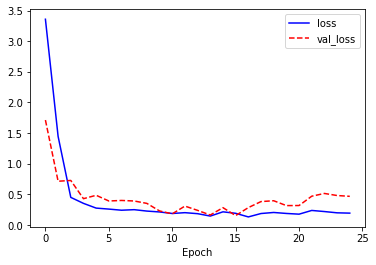

In [ ]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2359


0.23585020005702972

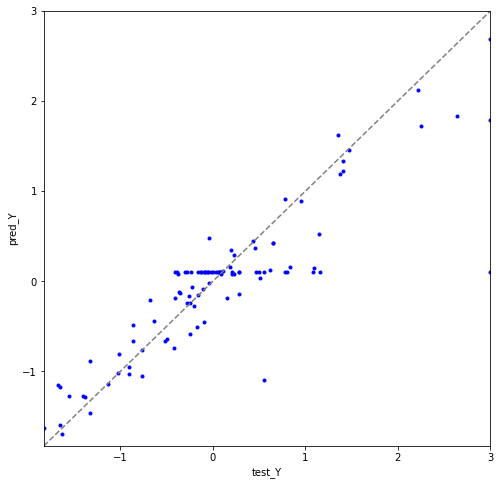

In [ ]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt
pred_Y = model.predict(test_X)
plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

In [ ]:
# 4.18 검증 데이터에 대한 성적이 좋도록 유도
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1925 - val_loss: 0.4512
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1788 - val_loss: 0.4493
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1739 - val_loss: 0.4414
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1910 - val_loss: 0.4448
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1769 - val_loss: 0.4247
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1648 - val_loss: 0.4200
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1704 - val_loss: 0.4496
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1719 - val_loss: 0.4417
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1740 - val_loss: 0.4256


In [ ]:
# 4.18 13 에폭에서도 그 기록을 갱신하지 못했으므로 학습을 중단

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1707 - val_loss: 0.3830
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1741 - val_loss: 0.3835
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1561 - val_loss: 0.3690
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1420 - val_loss: 0.4270
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1543 - val_loss: 0.3739
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1401 - val_loss: 0.3709


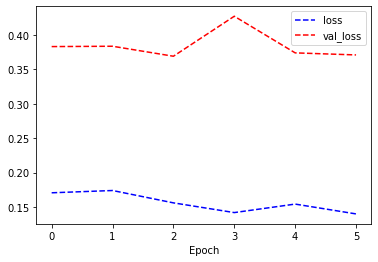

In [ ]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2135


0.21352992951869965

In [1]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="==", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

NameError: ignored

In [ ]:
# 모델 재정의 및 학습, dropout 사용
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(units=39, activation='relu'),
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor=='val_loss')])

SyntaxError: ignored

In [ ]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="==", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()